In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('BankChurners.xlsx')

In [4]:
df.shape

(10127, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

10127 rows and 23 columns

###### A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
df = df.drop(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'})
df.shape

(10127, 21)

In [8]:
df.head

<bound method NDFrame.head of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_C

In [9]:
df.drop('CLIENTNUM',axis=1,inplace = True)
df.shape

(10127, 20)

In [10]:
x = df.drop('Attrition_Flag',axis=1)
y = df.Attrition_Flag

In [11]:
x.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
y.isna().sum()

0

In [13]:
df.duplicated().value_counts()

False    10127
dtype: int64

##### No Duplicates and No Missing Values

### Descriptive Analysis

In [14]:
x.Gender.value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

###### 53 % of the clients are female || 47 % of the clients are male

In [15]:
x.Education_Level.value_counts(normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

In [16]:
x.Marital_Status.value_counts(normalize=True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [17]:
x.Income_Category.value_counts(normalize=True) 
 

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

In [18]:
x.Card_Category.value_counts(normalize=True) 

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

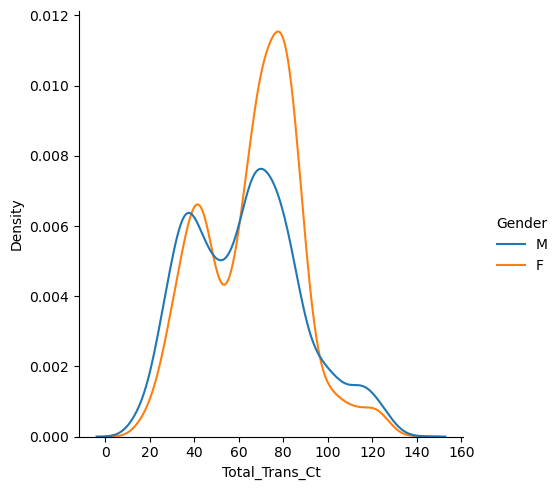

In [19]:
sns.displot(x, x='Total_Trans_Ct', hue='Gender', kind='kde')

The distributions of the total transactions are almost the same for Male and Female, except for the range (65,95) where we can see a significant spike in female customers in terms of number of transactions.

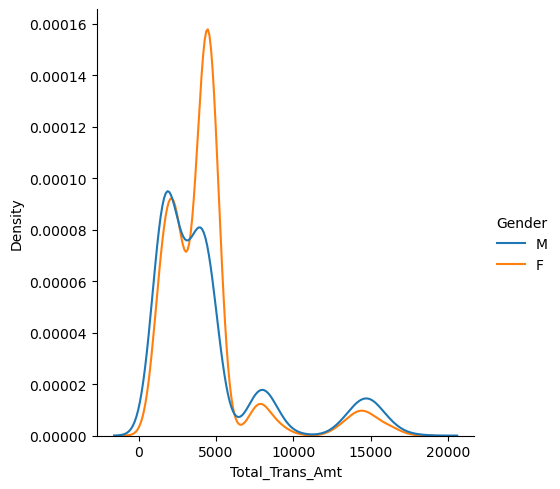

In [20]:
sns.displot(x, x='Total_Trans_Amt', hue='Gender', kind='kde')

The distributions of the total transaction_Amount are almost the same for Male and Female, except for the range (4000,6000) where we can see a significant spike in female customers in terms of transaction Amount.

Text(0, 0.5, 'Total Transaction Count')

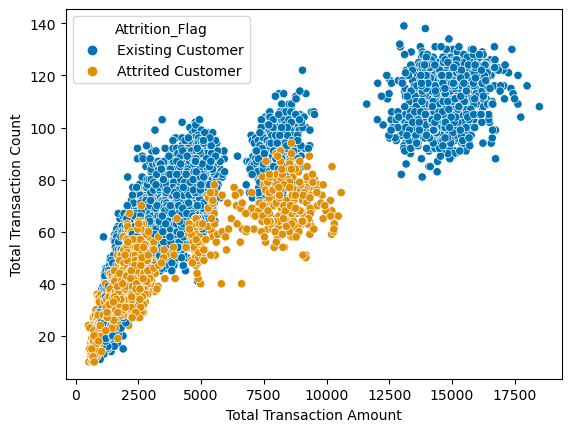

In [21]:
sns.scatterplot(data=df, x = 'Total_Trans_Amt' , y ='Total_Trans_Ct', hue ='Attrition_Flag',palette="colorblind")
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')


1.Attrited Customers tend to have lower Total Transaction Amounts and Total number of Transactions


2.Customers with Total_Trans_Amt > 12,500 AND Total_Trans_Ct > 100 have not churned at all

###### Total Transactions by Card Category

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Card_Category'>

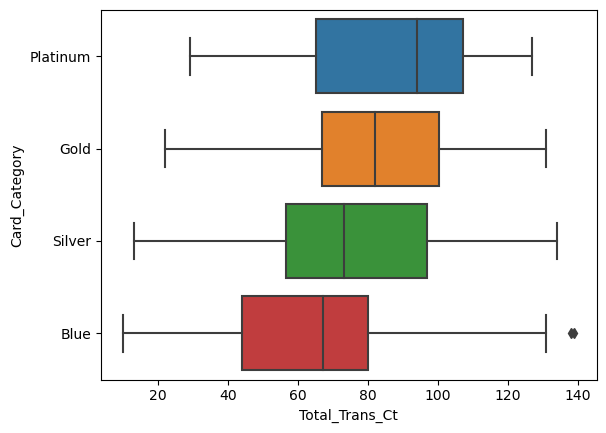

In [22]:
sns.boxplot(data=x,y='Card_Category',x='Total_Trans_Ct',order=['Platinum','Gold','Silver','Blue'])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Income_Category'>

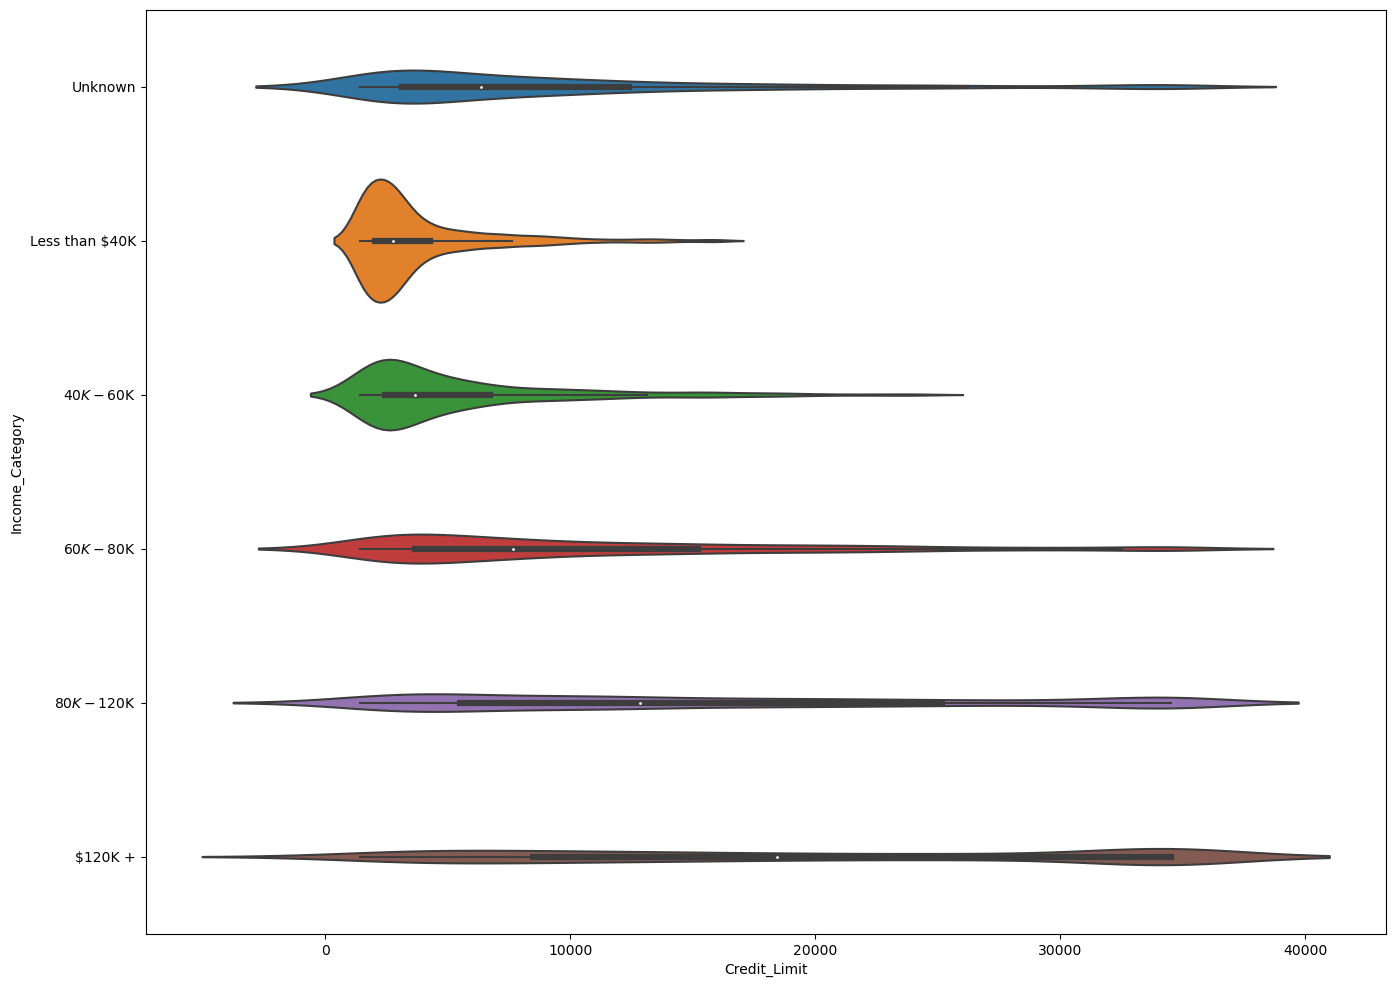

In [23]:
plt.figure(figsize=(16,12))
sns.violinplot(data=x,x='Credit_Limit',y='Income_Category',order=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])

The distribution of the credit limit is left-skewed for the lower income categories and as the income increases, the curve gets flattened, median increases and the range and the inter-quartile range increase. This is expected since customers with lower income have restrictions in the credit limits whereas customers with higher income have a wider range to select.

###### Age distribution

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

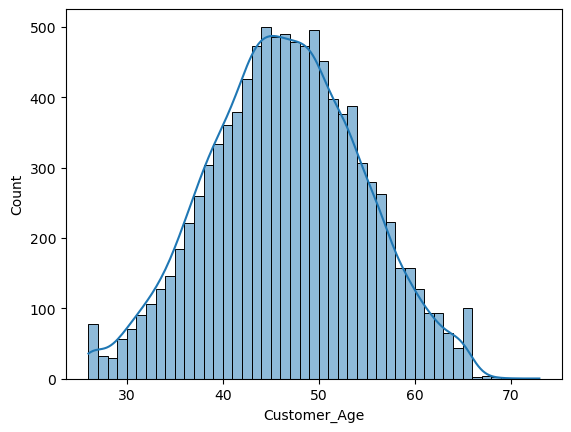

In [24]:
sns.histplot(data=x,x='Customer_Age',kde=True)

A almost symmetric distribution, with most of the clients in their mid 40s to early 50s 

<AxesSubplot:>

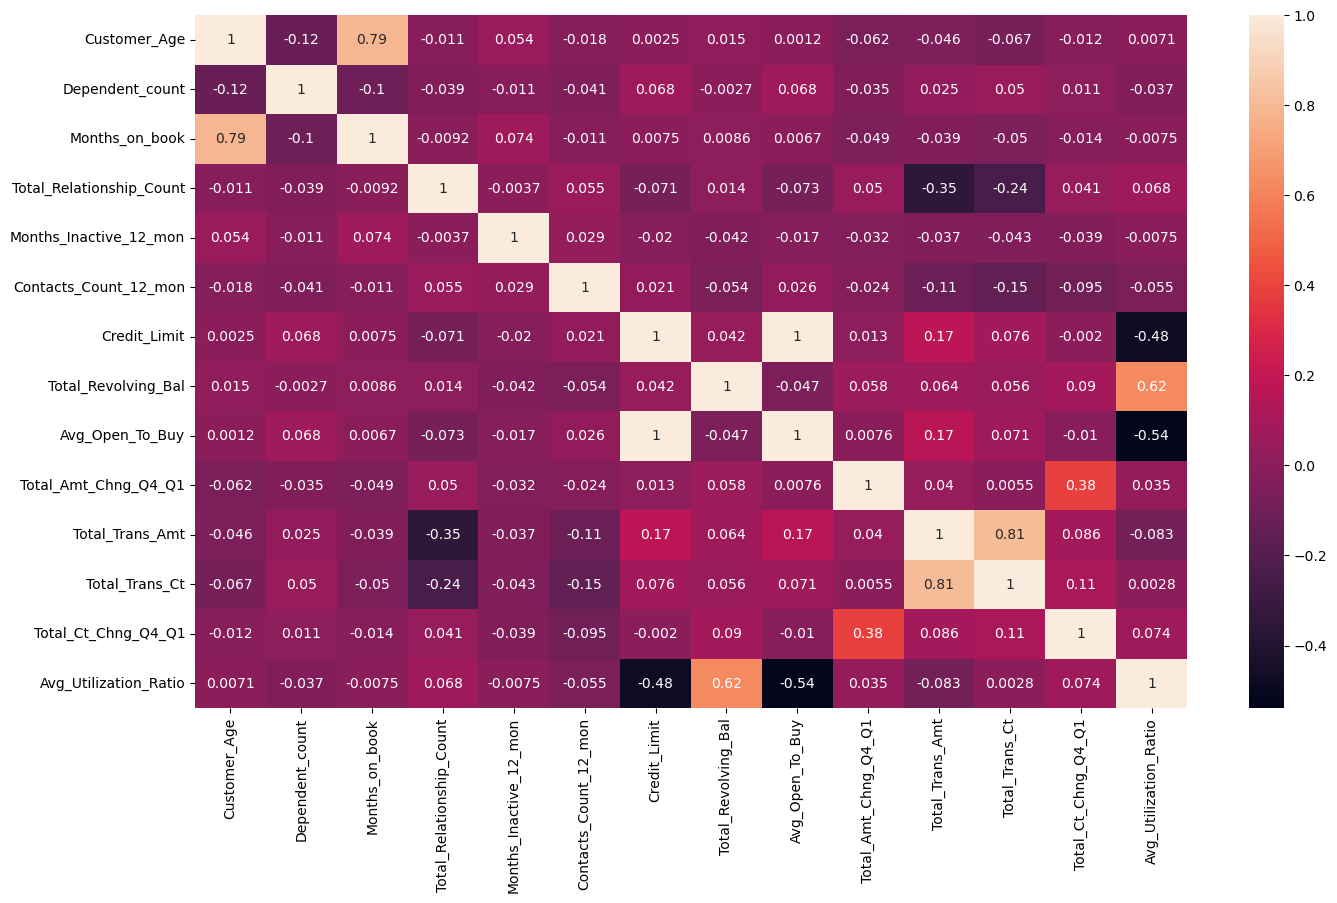

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

(Months_on_book , Customer_Age) and (Total_Trans_Amt,Total_Trans_Ct) are highly correlated

(Total_Revolving_Balance , Avg_Utilization_Ration)  are moderately correlated

where as (Credit_Limit , Avg_Utilization_Ratio) and (Avg_Open_To_Buy , Avg_Utilization_Ratio) have moderately negative correlation

###### Outlier Check

In [26]:
num_df = df.select_dtypes(exclude=['object']).columns

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

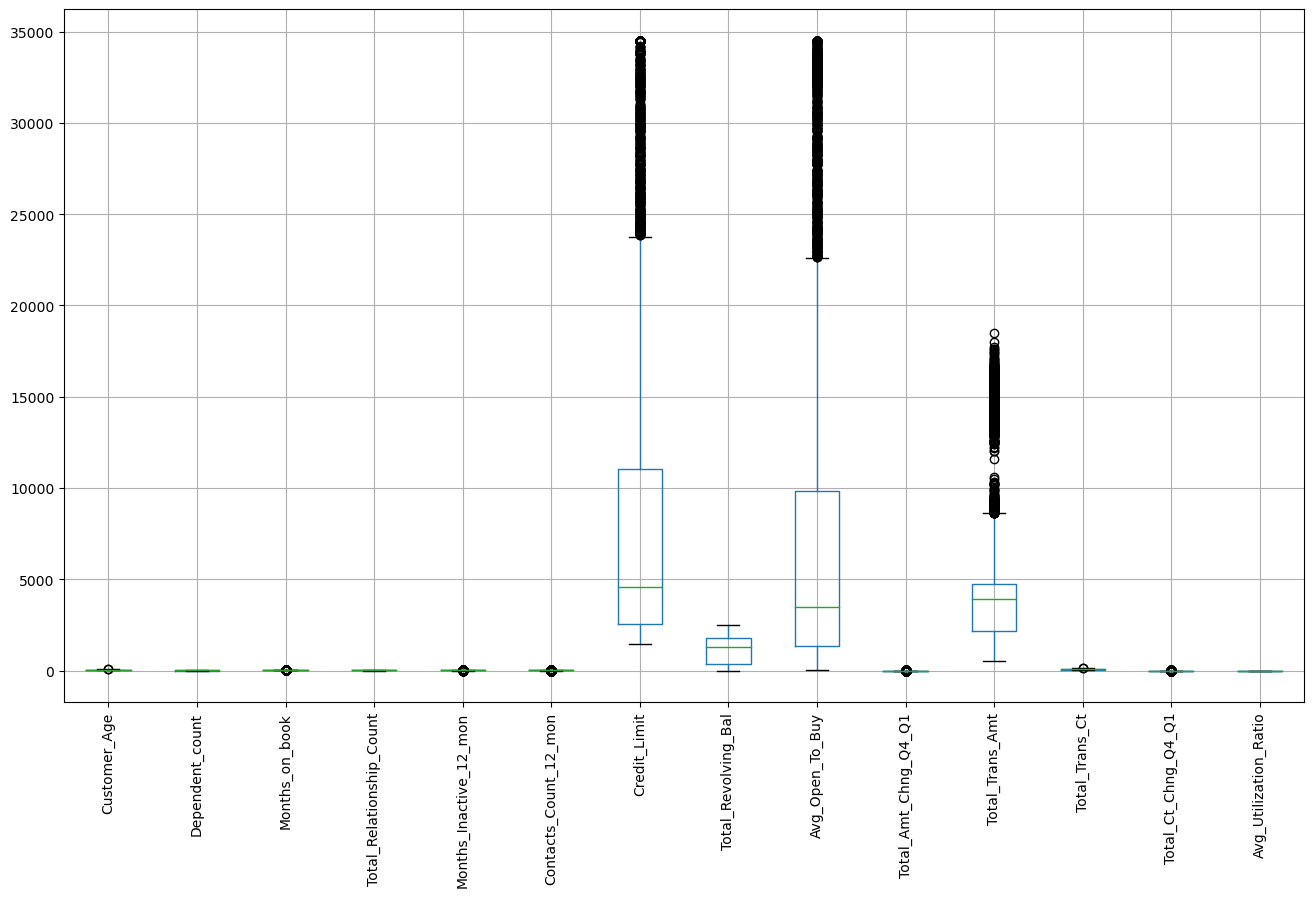

In [27]:
plt.figure(figsize=(16,9))
df[num_df].boxplot()
plt.xticks(rotation=90)
plt.tight_layout

there are outliers present in the numeric data types

In [28]:
def remove_outliers(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit,upper_limit

In [29]:
remove_outliers(df['Customer_Age'])

(24.5, 68.5)

In [30]:
df[df['Customer_Age'] > 68.5]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,Existing Customer,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.0,1125,3344.0,1.363,1765,34,1.615,0.252
254,Existing Customer,70,M,0,High School,Married,Less than $40K,Blue,56,3,2,3,3252.0,1495,1757.0,0.581,1227,15,0.875,0.460


In [31]:
df[  24.5 > df['Customer_Age']]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


### Data Preprocessing 

###### Encoding the target variable 

In [32]:
y = y.replace({"Existing Customer":0,"Attrited Customer":1})

In [33]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

###### Encoding the independent variables

In [34]:
x.Card_Category = x.Card_Category.replace({"Blue":0,"Silver":1,"Gold":2,"Platinum":3})
x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [35]:
x.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [36]:
x.Income_Category = x.Income_Category.replace({"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5})
x.Income_Category.value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

In [37]:
x.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [38]:
x.Education_Level = x.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x.Education_Level.value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: Education_Level, dtype: int64

In [39]:
x = pd.get_dummies(x,drop_first=True)

In [40]:
x

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,2,3,0,39,5,1,3,12691.0,...,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0
1,49,5,4,1,0,44,6,1,2,8256.0,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,51,3,4,4,0,36,4,1,0,3418.0,...,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0
3,40,4,2,1,0,34,3,4,1,3313.0,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,40,3,1,3,0,21,5,1,0,4716.0,...,4716.0,2.175,816,28,2.500,0.000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,4,2,0,40,3,2,3,4003.0,...,2152.0,0.703,15476,117,0.857,0.462,1,0,1,0
10123,41,2,0,2,0,25,4,2,3,4277.0,...,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0
10124,44,1,2,1,0,36,5,3,4,5409.0,...,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0
10125,30,2,4,2,0,36,4,3,3,5281.0,...,5281.0,0.535,8395,62,0.722,0.000,1,0,0,1


In [41]:
from scipy.stats import zscore

In [42]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Education_Level,10127.0,2.601955,1.700417,0.0,1.000,3.000,4.000,6.000
Income_Category,10127.0,2.085711,1.474639,0.0,1.000,2.000,3.000,5.000
Card_Category,10127.0,0.083638,0.333784,0.0,0.000,0.000,0.000,3.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000


In [43]:
df1 = x[['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
df1 = df1.apply(zscore)

Applying Zscore to the continuous numerical variables only

In [44]:
x_scaled = x.drop(['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'],axis=1)
x_scaled

,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Contacts_Count_12_mon,Total_Trans_Ct,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,3,2,3,0,5,3,42,1,1,0,0
1,5,4,1,0,6,2,33,0,0,1,0
2,3,4,4,0,4,0,20,1,1,0,0
3,4,2,1,0,3,1,20,0,0,0,1
4,3,1,3,0,5,0,28,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10122,2,4,2,0,3,3,117,1,0,1,0
10123,2,0,2,0,4,3,69,1,0,0,0
10124,1,2,1,0,5,4,60,0,1,0,0
10125,2,4,2,0,4,3,62,1,0,0,1


In [45]:
x_scaled = pd.concat([x_scaled, df1], axis = 1)
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependent_count,10127.0,2.346203e+00,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level,10127.0,2.601955e+00,1.700417,0.000000,1.000000,3.000000,4.000000,6.000000
Income_Category,10127.0,2.085711e+00,1.474639,0.000000,1.000000,2.000000,3.000000,5.000000
Card_Category,10127.0,8.363780e-02,0.333784,0.000000,0.000000,0.000000,0.000000,3.000000
Total_Relationship_Count,10127.0,3.812580e+00,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Total_Trans_Ct,10127.0,6.485869e+01,23.472570,10.000000,45.000000,67.000000,81.000000,139.000000
Gender_M,10127.0,4.709193e-01,0.499178,0.000000,0.000000,0.000000,1.000000,1.000000
Marital_Status_Married,10127.0,4.628222e-01,0.498641,0.000000,0.000000,0.000000,1.000000,1.000000
Marital_Status_Single,10127.0,3.893552e-01,0.487628,0.000000,0.000000,0.000000,1.000000,1.000000


discrete variables

In [46]:
x_disc = x_scaled.loc[:, ['Dependent_count','Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct']]

Categorial Variables

In [47]:
x_cat = x_scaled.loc[:, ['Education_Level','Income_Category','Card_Category','Gender_M','Marital_Status_Married','Marital_Status_Single',
                      'Marital_Status_Unknown']]

Continuous Variables

In [48]:
x_cont = x_scaled.loc[:, ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

Continuous Variables + Discrete variables

In [49]:
x_num = pd.concat([x_cont, x_disc], axis=1)

We need to check the Variance Inflation factor for the numerical variables 

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = x_num.columns
vif["VIF"] = [variance_inflation_factor(x_num.values, i) for i in range(x_num.shape[1])]
vif

,Variable,VIF
0,Customer_Age,2.662975
1,Months_on_book,2.657995
2,Total_Revolving_Bal,inf
3,Total_Trans_Amt,2.472178
4,Months_Inactive_12_mon,1.011111
5,Credit_Limit,inf
6,Avg_Open_To_Buy,inf
7,Total_Amt_Chng_Q4_Q1,1.188221
8,Total_Ct_Chng_Q4_Q1,1.203344
9,Avg_Utilization_Ratio,2.884548


Performing PCA on continuous variables to reduce the components, to have number of components such that the cummulative explained variace ratio is 0.95

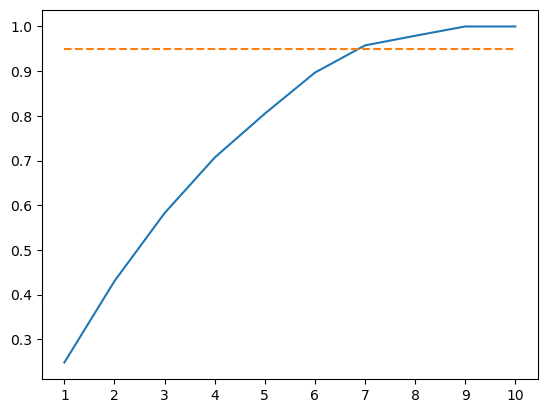

In [51]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(df1)
x_pca = pca10.transform(df1)
    
l2 = []
for i in np.arange(1, 11, 1):
    l2.append(0.95)

plt.plot(np.arange(1, 11, 1), np.cumsum(pca10.explained_variance_ratio_))
plt.plot(np.arange(1, 11, 1), l2, ls='--')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [52]:
pca7 = PCA(n_components=7)
pca7.fit(df1)
x_cont_pca = pca7.transform(df1)
x_pca = pd.DataFrame(x_cont_pca, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

In [53]:
x_non_cont = pd.concat([x_disc, x_cat], axis=1)

Select the best features for the non continuous variables

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
kbest = SelectKBest(score_func=f_classif, k='all')
kbest.fit(x_non_cont, y)

SelectKBest(k='all')

                     Feature        Score
0             Total_Trans_Ct  1620.121692
1      Contacts_Count_12_mon   441.868050
2   Total_Relationship_Count   233.072886
3                   Gender_M    14.085007
4     Marital_Status_Married     5.707375
5      Marital_Status_Single     3.670544
6            Dependent_count     3.652825
7            Income_Category     1.866806
8     Marital_Status_Unknown     0.802831
9            Education_Level     0.783429
10             Card_Category     0.056086


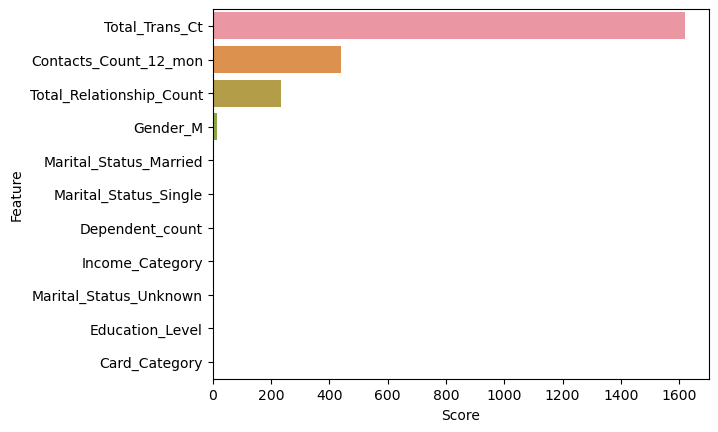

In [55]:
kbest_scores = pd.DataFrame({'Feature':x_non_cont.columns, 'Score':kbest.scores_})
kbest_scores.sort_values(by='Score', ascending=False, axis=0, inplace=True)
kbest_scores.reset_index(drop=True, inplace=True)
print(kbest_scores)
sns.barplot(data=kbest_scores, x='Score', y='Feature', orient='h')
plt.show()

Selecting the top features based on importance from the feature selection process

In [56]:
x_kbest = x_non_cont.loc[:, ['Total_Trans_Ct', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Gender_M']]

In [57]:
x_final = pd.concat([x_kbest, x_pca], axis=1)
x_final

,Total_Trans_Ct,Contacts_Count_12_mon,Total_Relationship_Count,Gender_M,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,42,3,5,1,0.710226,0.782889,2.715583,3.571826,-0.845914,-1.590398,1.014816
1,33,2,6,0,-0.317211,1.246205,7.545179,8.439454,-0.541716,-1.596277,6.546116
2,20,0,4,1,-0.304757,1.787191,5.874977,8.954282,-0.553843,-1.811624,-0.874809
3,20,1,3,0,-2.466982,1.826413,5.191908,3.671958,2.500943,-1.239714,2.866903
4,28,0,5,1,-0.168211,3.746528,4.860739,8.054771,-0.377919,-1.962017,1.086758
...,...,...,...,...,...,...,...,...,...,...,...
10122,117,3,3,1,-0.688257,-0.208845,1.595148,-0.547319,-0.713657,3.082319,0.195072
10123,69,3,4,1,-1.117768,1.646974,0.756371,-0.974501,-0.203520,1.021232,-0.353592
10124,60,4,5,0,0.697055,0.284110,-0.486911,1.422792,0.262682,2.015210,-0.002833
10125,62,3,4,1,0.648035,1.156376,-1.671960,0.508722,0.357661,1.661770,0.692589


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69, stratify=y)

## Model Building 

#### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=69)
model1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=69)

In [60]:
model1.score(x_test,y_test)

0.9368213228035538

Test Data 

In [61]:
from sklearn.metrics import classification_report
y_pred_test = model1.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1701
           1       0.79      0.83      0.81       325

    accuracy                           0.94      2026
   macro avg       0.88      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026



Train Data

In [62]:
y_pred_train = model1.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



#### KNN Classifier

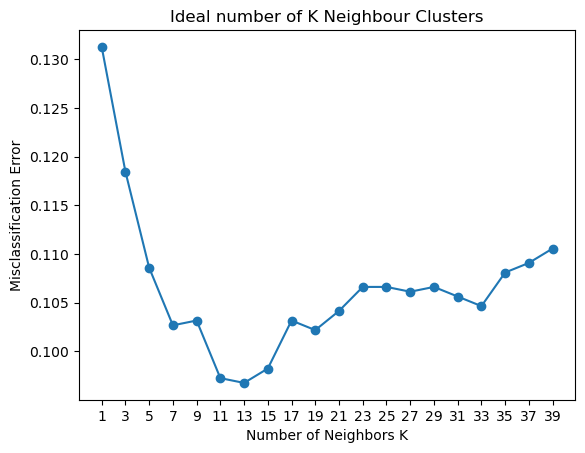

In [63]:
from sklearn.neighbors import KNeighborsClassifier
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,40,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE
plt.title("Ideal number of K Neighbour Clusters")
plt.plot(range(1,40,2), MCE,marker = "o")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xticks(np.arange(1,40,2))
plt.show()


In [64]:
model2 = KNeighborsClassifier(n_neighbors=13)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9032576505429417

Test Data

In [65]:
y_pred_test = model2.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1701
           1       0.74      0.62      0.67       325

    accuracy                           0.90      2026
   macro avg       0.83      0.79      0.81      2026
weighted avg       0.90      0.90      0.90      2026



Train Data

In [66]:
y_pred_train = model2.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6799
           1       0.77      0.59      0.67      1302

    accuracy                           0.91      8101
   macro avg       0.85      0.78      0.81      8101
weighted avg       0.90      0.91      0.90      8101



#### Naive Bayes Classifier

In [67]:
from sklearn.naive_bayes import GaussianNB
model3 =  GaussianNB()
model3.fit(x_train,y_train)
model3.score (x_test,y_test)

0.9012833168805529

Test Data

In [68]:
y_pred_test = model3.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1701
           1       0.71      0.66      0.68       325

    accuracy                           0.90      2026
   macro avg       0.82      0.80      0.81      2026
weighted avg       0.90      0.90      0.90      2026



Train Data 

In [69]:
y_pred_train = model3.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6799
           1       0.71      0.62      0.66      1302

    accuracy                           0.90      8101
   macro avg       0.82      0.79      0.80      8101
weighted avg       0.89      0.90      0.90      8101



#### LDA 

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model4 = LinearDiscriminantAnalysis()
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9062191510365252

Test Data

In [71]:
y_pred_test = model4.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1701
           1       0.76      0.61      0.67       325

    accuracy                           0.91      2026
   macro avg       0.84      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026



Train Data

In [72]:
y_pred_train = model4.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6799
           1       0.76      0.62      0.68      1302

    accuracy                           0.91      8101
   macro avg       0.84      0.79      0.81      8101
weighted avg       0.90      0.91      0.90      8101



#### Logistic Regression 

In [73]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.8795656465942744

Test Data

In [74]:
y_pred_test = model5.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1701
           1       0.70      0.44      0.54       325

    accuracy                           0.88      2026
   macro avg       0.80      0.70      0.74      2026
weighted avg       0.87      0.88      0.87      2026



Train Data

In [75]:
y_pred_train = model5.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      6799
           1       0.67      0.40      0.50      1302

    accuracy                           0.87      8101
   macro avg       0.78      0.68      0.71      8101
weighted avg       0.86      0.87      0.86      8101



### Ensemble Methods and Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

#### Random Forests

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=69)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9595261599210266

Test Data

In [78]:
y_pred_test = rf.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.91      0.83      0.87       325

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



Train Data

In [79]:
y_pred_train = rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



### Hyper Parameter Tuning

##### KNN

In [94]:
param_grid = {'n_neighbors': np.arange(0,10),
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'weights': ['uniform', 'distance'],
             
             }
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [97]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [98]:
tuned_knn = KNeighborsClassifier(n_neighbors=9, metric= 'manhattan', weights= 'distance')
tuned_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [100]:
y_predict_test = tuned_knn.predict(x_test)
print("Test Data Report :\n",classification_report(y_test,y_predict_test))

Test Data Report :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1701
           1       0.72      0.61      0.66       325

    accuracy                           0.90      2026
   macro avg       0.82      0.78      0.80      2026
weighted avg       0.89      0.90      0.90      2026



In [101]:
y_predict_train = tuned_knn.predict(x_train)
print("Train Data Report :\n",classification_report(y_train,y_predict_train))

Train Data Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



#### CART

In [102]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':range(2,10,1)
             }
tree_clas = DecisionTreeClassifier(random_state=69)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=69),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': range(2, 10)},
             verbose=True)

In [103]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [104]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15,
                       max_features='auto',min_samples_leaf= 1,min_samples_split=6,
                           random_state=69)
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='auto', min_samples_split=6,
                       random_state=69)

In [105]:
y_predict_test = reg_dt_model.predict(x_test)
print("Test Data Report :\n",classification_report(y_test,y_predict_test))

Test Data Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1701
           1       0.75      0.74      0.74       325

    accuracy                           0.92      2026
   macro avg       0.85      0.85      0.85      2026
weighted avg       0.92      0.92      0.92      2026



In [106]:
y_predict_train = reg_dt_model.predict(x_train)
print("Train Data Report :\n",classification_report(y_train,y_predict_train))

Train Data Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6799
           1       0.83      0.82      0.83      1302

    accuracy                           0.94      8101
   macro avg       0.90      0.89      0.90      8101
weighted avg       0.94      0.94      0.94      8101



#### Random Forest Tuned

In [80]:
param_grid = {'max_features':['sqrt','log2','auto'],
              'n_estimators': np.arange(10,100,1000), 
              'criterion':['gini','entropy','log loss'],
               'max_depth': range(2,20,1),
              'min_samples_leaf': range(1,10,1),
              'min_samples_split':range(2,10,1)
             }
RF = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log loss'],
                         'max_depth': range(2, 20),
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': array([10])},
             verbose=True)

In [81]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 10}

In [82]:
hyper_RF = RandomForestClassifier( n_estimators=10,criterion='entropy', max_depth=17,
                       max_features='sqrt',min_samples_leaf= 1,min_samples_split=7,
                           random_state=69)
hyper_RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       min_samples_split=7, n_estimators=10, random_state=69)

In [83]:
y_predict_test = hyper_RF.predict(x_test)
print("Test Data Report :\n",classification_report(y_test,y_predict_test))

Test Data Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.89      0.78      0.83       325

    accuracy                           0.95      2026
   macro avg       0.93      0.88      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [84]:
y_predict_train = hyper_RF.predict(x_train)
print("Train Data Report :\n",classification_report(y_train,y_predict_train))

Train Data Report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6799
           1       0.99      0.96      0.98      1302

    accuracy                           0.99      8101
   macro avg       0.99      0.98      0.99      8101
weighted avg       0.99      0.99      0.99      8101



In [97]:
hyper_RF.score(x_test, y_test)

0.9491609081934848

In [96]:
hyper_RF.score(x_train, y_train)

0.9924700654240217

#### Bagging Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier
bag1 = BaggingClassifier(n_estimators=1000, random_state=69)
bag1.fit(x_train, y_train)
bag1.score(x_test, y_test)

0.9590325765054294

In [86]:
bag1.score(x_train, y_train)

1.0

#### Ada Boost Classifier
### BEST Performing model

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=1000, learning_rate=0.05)
ada1.fit(x_train, y_train)
ada1.score(x_test, y_test)

0.956071076011846

In [88]:
ada1.score(x_train, y_train)

0.9611159116158499

In [98]:
y_predict_test = ada1.predict(x_test)
print("Test Data Report :\n",classification_report(y_test,y_predict_test))

Test Data Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1701
           1       0.90      0.82      0.86       325

    accuracy                           0.96      2026
   macro avg       0.93      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [99]:
y_predict_train = ada1.predict(x_train)
print("Train Data Report :\n",classification_report(y_train,y_predict_train))

Train Data Report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6799
           1       0.93      0.82      0.87      1302

    accuracy                           0.96      8101
   macro avg       0.95      0.91      0.92      8101
weighted avg       0.96      0.96      0.96      8101



<AxesSubplot:>

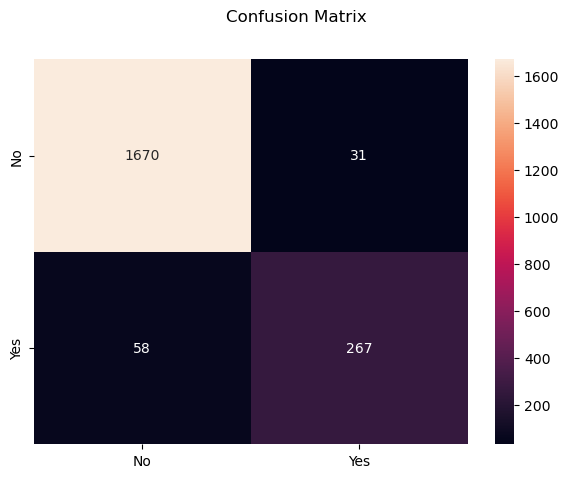

In [103]:
from sklearn import metrics
y_predict_test = ada1.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
plt.suptitle("Confusion Matrix")
sns.heatmap(df_cm, annot=True ,fmt='g')

###### The following are the most important features

In [105]:
print (pd.DataFrame(ada1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by='Imp',ascending=False))

                            Imp
Total_Trans_Amt           0.389
Total_Trans_Ct            0.225
Total_Revolving_Bal       0.108
Total_Amt_Chng_Q4_Q1      0.061
Total_Ct_Chng_Q4_Q1       0.055
Total_Relationship_Count  0.046
Months_Inactive_12_mon    0.031
Customer_Age              0.028
Contacts_Count_12_mon     0.026
Avg_Open_To_Buy           0.011
Credit_Limit              0.007
Marital_Status_Married    0.007
Gender_M                  0.006
Dependent_count           0.000
Months_on_book            0.000
Card_Category             0.000
Income_Category           0.000
Education_Level           0.000
Avg_Utilization_Ratio     0.000
Marital_Status_Single     0.000
Marital_Status_Unknown    0.000


95.6 % accuracy on the test data

#### XGB Classifier

In [94]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb1.fit(x_train, y_train)
xgb1.score(x_test, y_test)

0.9708785784797631

In [95]:
xgb1.score(x_train, y_train)

1.0